1. Introduction to SVM

2. Soft Margin and Hard Margin

3. SVM MAth intuition

4. Cost efficient

5. Support Vector machine

6. SVM kernels

7. SVM kernels implementation

8. Support Vector Classifiers


## cost function 
    min(|w|)/2
#

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# lets create synthtic data points
from sklearn.datasets import make_classification

x,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

print(x)

print(y)

[[-1.84141053  1.17664695]
 [-1.62335107 -1.00092692]
 [-0.37294152 -0.06872088]
 ...
 [-1.22754663  0.32457786]
 [ 0.95837658 -2.48576399]
 [-2.32538627  0.33737544]]
[0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0
 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0
 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0
 0 1 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0
 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0
 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1
 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 1
 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1
 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1
 0 1 0 

<Axes: xlabel='0', ylabel='1'>

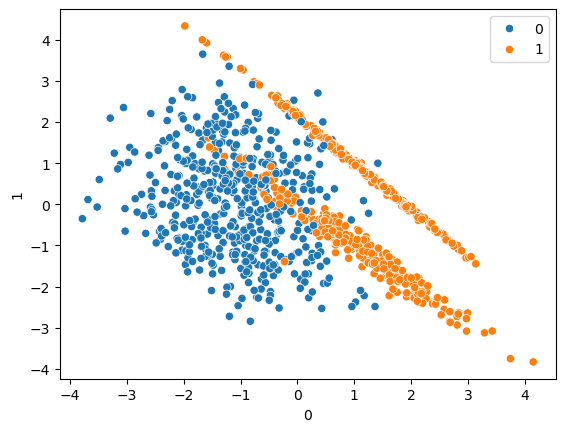

In [19]:
pd.DataFrame(x)[0]

sns.scatterplot(
    x=pd.DataFrame(x)[0],
    y=pd.DataFrame(x)[1],
    hue=y
)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=42,random_state=10)
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
svc.coef_

y_pred=svc.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.90      0.95      0.92        19

    accuracy                           0.93        42
   macro avg       0.93      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42

[[21  2]
 [ 1 18]]


In [21]:
polynomial2=SVC(kernel='poly')
polynomial2.fit(x_train,y_train)
y_pred2=polynomial2.predict(x_test)
print(classification_report(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86        23
           1       0.93      0.68      0.79        19

    accuracy                           0.83        42
   macro avg       0.86      0.82      0.83        42
weighted avg       0.85      0.83      0.83        42

[[22  1]
 [ 6 13]]


In [26]:
rbf=SVC(kernel='rbf')
rbf.fit(x_train,y_train)
y_pred1=rbf.predict(x_test)
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91        23
           1       0.86      0.95      0.90        19

    accuracy                           0.90        42
   macro avg       0.90      0.91      0.90        42
weighted avg       0.91      0.90      0.90        42

[[20  3]
 [ 1 18]]


In [25]:
sigmoid1=SVC(kernel='sigmoid')
sigmoid1.fit(x_train,y_train)
y_pred3=sigmoid1.predict(x_test)
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        23
           1       0.76      0.84      0.80        19

    accuracy                           0.81        42
   macro avg       0.81      0.81      0.81        42
weighted avg       0.81      0.81      0.81        42

[[18  5]
 [ 3 16]]


In [29]:
# hyper parameter tuning with svc

from sklearn.model_selection import GridSearchCV

# defining parameters range

param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']}

grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

grid.fit(x_train,y_train)

grid.best_params_



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.917 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.943 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.885 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.921 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.859 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.922 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.874 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.890 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.875 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [30]:
y_pred4=grid.predict(x_test)
print(classification_report(y_test,y_pred4))

print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       0.90      0.95      0.92        19

    accuracy                           0.93        42
   macro avg       0.93      0.93      0.93        42
weighted avg       0.93      0.93      0.93        42

[[21  2]
 [ 1 18]]


## c = Regularization parameter
## gamma = Influence of a single data point 

## total combination :
# 5(c)*5(gamma)*1(kernel)=25 models

here we used gridsearchcv is used to perform hyperpaameter tunning 

it check all combos of given parameters using cv and selects the model with best performance...
